<a href="https://colab.research.google.com/github/tg-bomze/Style-Transfer-Collection/blob/master/(Photo)_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">Neural-Style-Transfer</font></b>

<b><font color="black" size="+2">Based on:</font></b>

**GitHub repository**: [Neural-Style-Transfer](https://github.com/titu1994/Neural-Style-Transfer)

Article: [A Neural Algorithm of Artistic Style](http://arxiv.org/abs/1508.06576)

Creator: **[Somshubra Majumdar](https://github.com/titu1994).**

<b><font color="black" size="+2">Colab created by:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).

---


```
(ENG) To get started, click on the button (where the red arrow indicates). After clicking, wait until the execution is complete.
```
```
(RUS) Чтобы начать, нажмите на кнопку (куда указывает красная стрелка), после чего дождитесь завершения выполнения блока.
```


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary components</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые компоненты</font></b>

import os
import io
import cv2
from PIL import Image
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
%matplotlib inline

!pip install scipy==1.1.0
!git clone https://github.com/titu1994/Neural-Style-Transfer.git


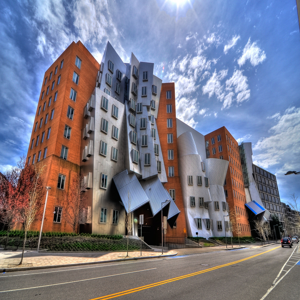

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload content image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить основное фото</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
content_img = "content." + fn.split(".")[-1]
!mv -f $fn $content_img

im = Image.open(content_img)
(width, height) = im.size
content_img_max = max(width, height)
content_img_min = min(width, height)

display(Image.open(content_img).resize((300, 300)))

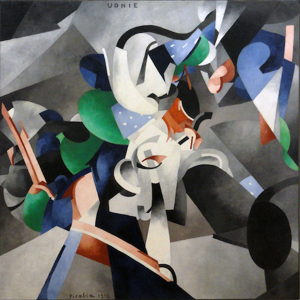

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload style image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить фото со стилем</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
style_img = "style." + fn.split(".")[-1]
!mv -f $fn $style_img

im = Image.open(style_img)
(width, height) = im.size
style_img_max = max(width, height)
style_img_min = min(width, height)

display(Image.open(style_img).resize((300, 300)))

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Style Transfer</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Перенести стиль из фото на видео</font></b>
%%time
import os

NETWORK = 'INetwork' #@param ["INetwork", "Network"]
dir_path = '/content/Neural-Style-Transfer/' + NETWORK + '.py'
MODEL = 'vgg19' #@param ["vgg19", "vgg16"]
NUM_ITERATIONS = 10 #@param {type:"slider", min:5, max:30, step:1}
#@markdown ---

# Image size
IMAGE_SIZE = content_img_min

# Loss Weights
CONTENT_WEIGHT = 0.025 #@param {type:"slider", min:0, max:1, step:0.025}
STYLE_WEIGHT = 1.0 #@param {type:"slider", min:0, max:1, step:0.025}
STYLE_SCALE = 1.0 #@param {type:"slider", min:0, max:1, step:0.025}
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0 #@param [0, 1, 2]

# Training arguments
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max' #@param ["max", "ave"]

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

!python $dir_path $content_img $style_img $RESULT_PREFIX \
  --image_size $IMAGE_SIZE --content_weight $CONTENT_WEIGHT --style_weight \
  $STYLE_WEIGHT --style_scale $STYLE_SCALE --total_variation_weight \
  $TOTAL_VARIATION_WEIGHT --content_loss_type $CONTENT_LOSS_TYPE --num_iter \
  $NUM_ITERATIONS --model $MODEL --rescale_image $RESCALE_IMAGE \
  --maintain_aspect_ratio $MAINTAIN_ASPECT_RATIO --content_layer $CONTENT_LAYER \
  --init_image $INITIALIZATION_IMAGE --pool_type $POOLING_TYPE --preserve_color \
  $PRESERVE_COLOR --min_improvement $MIN_IMPROVEMENT

clear_output()

CPU times: user 354 ms, sys: 80 ms, total: 434 ms
Wall time: 2min 40s


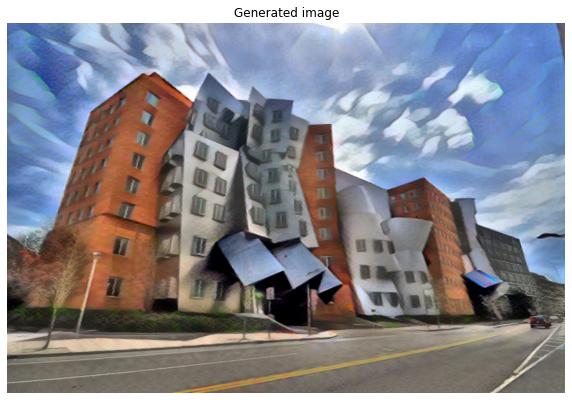

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Open the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Открыть итоговый результат</font></b>
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.imshow(img)

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачать итоговый результат</font></b>
files.download(FINAL_IMAGE_PATH)